In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holidays
import datetime
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49
...,...,...,...,...,...,...
136945,136945,2021-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding,700
136946,136946,2021-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs,752
136947,136947,2021-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,111
136948,136948,2021-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions,641


In [4]:
df['date'] = df['date'].astype('datetime64')

In [5]:
df['date']

0        2017-01-01
1        2017-01-01
2        2017-01-01
3        2017-01-01
4        2017-01-01
            ...    
136945   2021-12-31
136946   2021-12-31
136947   2021-12-31
136948   2021-12-31
136949   2021-12-31
Name: date, Length: 136950, dtype: datetime64[ns]

In [6]:
df['year'] = df.date.dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [7]:
df

,id,date,country,store,product,num_sold,year,month,day
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63,2017,1,1
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66,2017,1,1
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9,2017,1,1
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59,2017,1,1
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49,2017,1,1
...,...,...,...,...,...,...,...,...,...
136945,136945,2021-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding,700,2021,12,31
136946,136946,2021-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs,752,2021,12,31
136947,136947,2021-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,111,2021,12,31
136948,136948,2021-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions,641,2021,12,31


In [8]:
products = df['product'].unique()
countrys = df['country'].unique()
stores = df['store'].unique()

In [9]:
np.round(pd.pivot_table(data=df, index=['country', 'store'], columns='product',
                        values = 'num_sold'), 2).style.background_gradient('autumn_r')

<Axes: xlabel='country', ylabel='num_sold'>

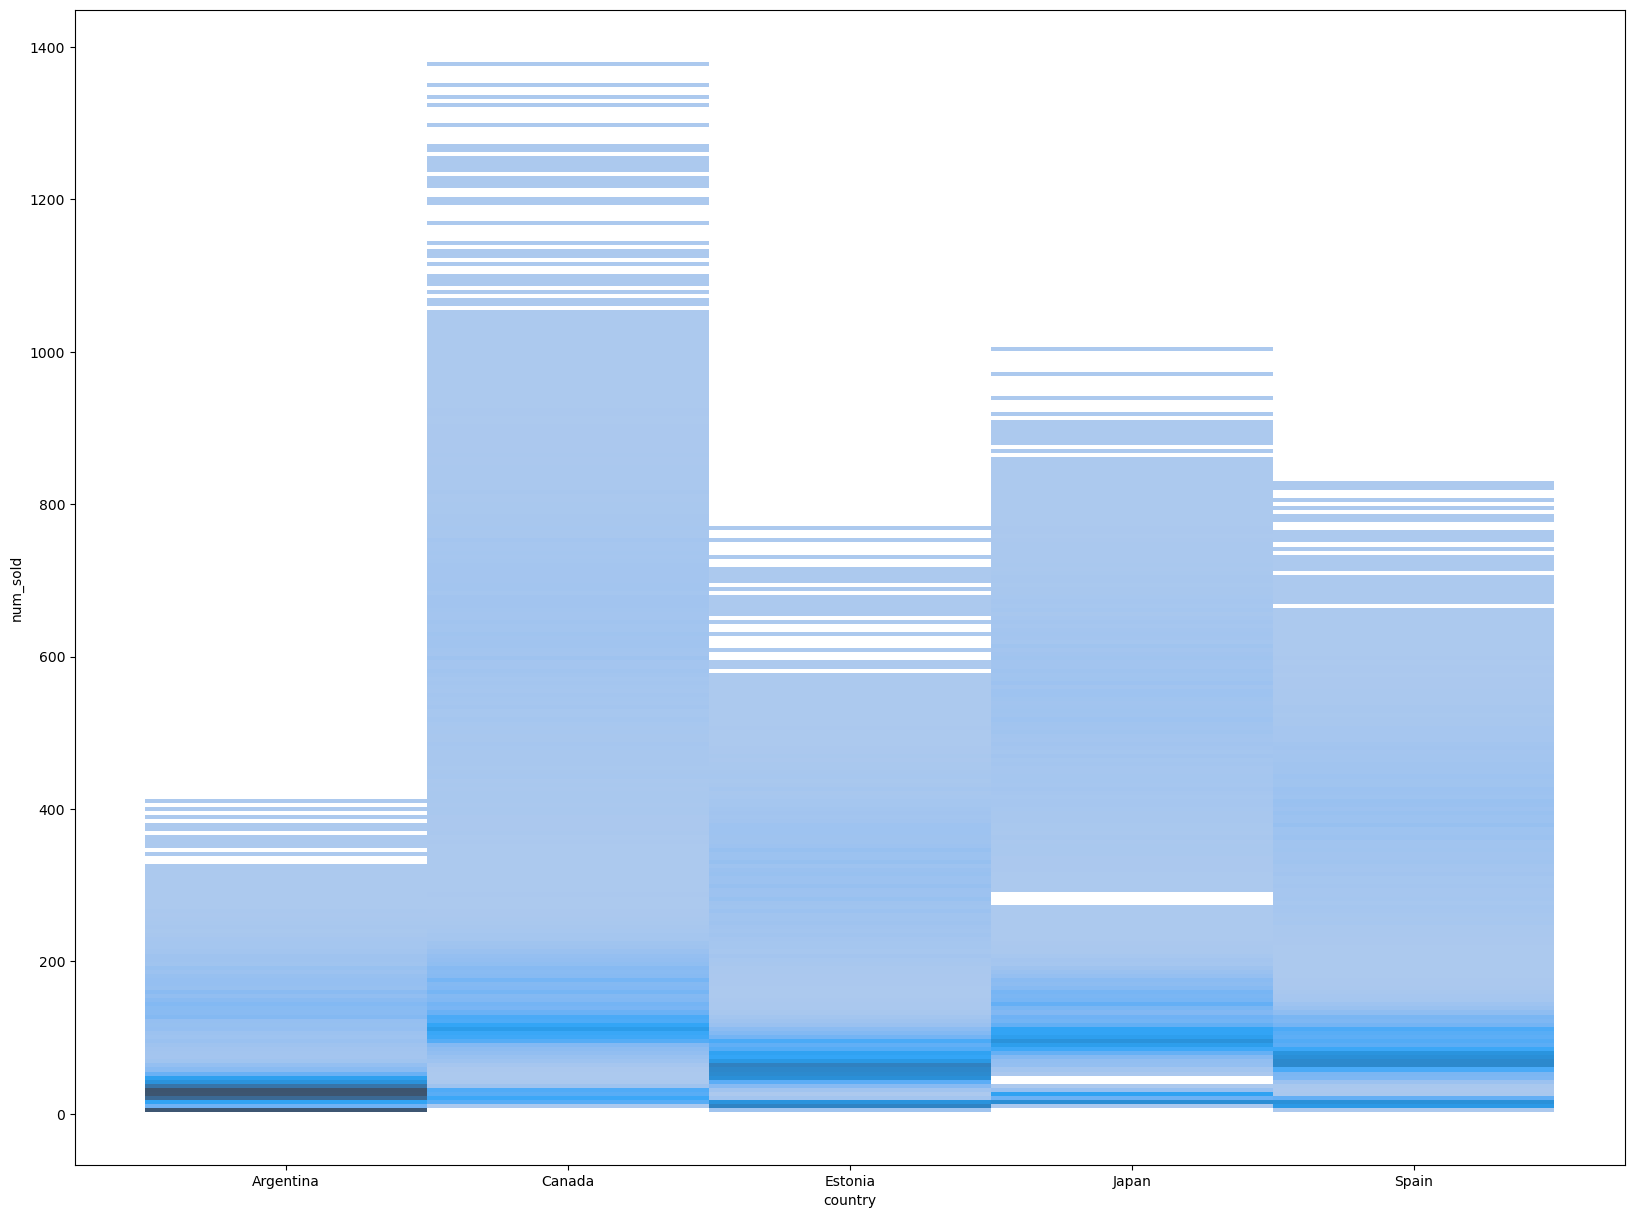

In [10]:
plt.figure(figsize = (20,15))
sns.histplot(data = df, x = 'country', y = 'num_sold')

_Больше всего продаж в Канаде_

In [11]:
df.groupby(['country', 'store'])['num_sold'].sum().sort_values(ascending = False)

country    store       
Canada     Kagglazon       4842322
Japan      Kagglazon       4154670
Spain      Kagglazon       3026408
Estonia    Kagglazon       2472309
Canada     Kaggle Store    1316665
Argentina  Kagglazon       1165626
Japan      Kaggle Store    1127598
Canada     Kaggle Learn     854127
Spain      Kaggle Store     821572
Japan      Kaggle Learn     731518
Estonia    Kaggle Store     670621
Spain      Kaggle Learn     532882
Estonia    Kaggle Learn     434389
Argentina  Kaggle Store     314600
           Kaggle Learn     203018
Name: num_sold, dtype: int64

In [12]:
pd.pivot_table(data = df, index=['year', 'month'],
               columns='store',
               values='num_sold').style.background_gradient('Dark2')

_Самые популярными месяцами являются ***декабрь*** и ***январь***(На новогодние праздники)_

_Наиболее популярный магазин **Kagglazone**_

In [13]:
df['country'].unique()

array(['Argentina', 'Canada', 'Estonia', 'Japan', 'Spain'], dtype=object)

In [14]:
df_arg = df[df['country']=='Argentina']

In [15]:
df[(df['country']=='Argentina')&(df['year']==2017)]

,id,date,country,store,product,num_sold,year,month,day
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63,2017,1,1
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66,2017,1,1
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9,2017,1,1
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59,2017,1,1
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49,2017,1,1
...,...,...,...,...,...,...,...,...,...
27310,27310,2017-12-31,Argentina,Kagglazon,Using LLMs to Improve Your Coding,380,2017,12,31
27311,27311,2017-12-31,Argentina,Kagglazon,Using LLMs to Train More LLMs,351,2017,12,31
27312,27312,2017-12-31,Argentina,Kagglazon,Using LLMs to Win Friends and Influence People,59,2017,12,31
27313,27313,2017-12-31,Argentina,Kagglazon,Using LLMs to Win More Kaggle Competitions,355,2017,12,31


In [16]:
df['country'].unique()

array(['Argentina', 'Canada', 'Estonia', 'Japan', 'Spain'], dtype=object)

In [17]:
holidays.CountryHoliday('AR', years=2017)

{datetime.date(2017, 1, 1): 'Año Nuevo', datetime.date(2017, 2, 27): 'Día de Carnaval', datetime.date(2017, 2, 28): 'Día de Carnaval', datetime.date(2017, 3, 24): 'Día Nacional de la Memoria por la Verdad y la Justicia', datetime.date(2017, 4, 2): 'Día del Veterano y de los Caidos en la Guerra de Malvinas', datetime.date(2017, 4, 14): 'Viernes Santo', datetime.date(2017, 5, 1): 'Día del Trabajo', datetime.date(2017, 5, 25): 'Día de la Revolución de Mayo', datetime.date(2017, 6, 20): 'Paso a la Inmortalidad del General Don Manuel Belgrano', datetime.date(2017, 7, 9): 'Día de la Independencia', datetime.date(2017, 12, 8): 'Inmaculada Concepción de María', datetime.date(2017, 12, 25): 'Navidad', datetime.date(2017, 6, 17): 'Paso a la Inmortalidad del General Don Martín Miguel de Güemes', datetime.date(2017, 8, 21): 'Paso a la Inmortalidad del General Don José de San Martin (Observado)', datetime.date(2017, 10, 16): 'Día del Respeto a la Diversidad Cultural (Observado)', datetime.date(2017

In [18]:
years_list = [2017,2018,2019,2020,2021]

holidays_arg = holidays.CountryHoliday('AR', years=years_list)
holidays_can = holidays.CountryHoliday('CA', years = years_list)
holidays_est = holidays.CountryHoliday('EE', years = years_list)
holidays_jap = holidays.CountryHoliday('JP', years=years_list)
holidays_spn = holidays.CountryHoliday('ES', years=years_list)

df_holidays = pd.DataFrame(columns=['date', 'AR', 'CA', 'EE', 'JP', 'ES'])

for date in pd.date_range(start='2017-01-01', end='2021-12-31'):
    ar = 1 if date in holidays_arg else 0
    ca = 1 if date in holidays_can else 0
    ee = 1 if date in holidays_est else 0
    jp = 1 if date in holidays_jap else 0
    es = 1 if date in holidays_spn else 0
    df_holidays = df_holidays.append({'date': date, 'AR': ar, 'CA': ca, 'EE': ee, 'JP': jp, 'ES': es}, ignore_index=True)
    
df['Arg_holiday'] = df['date'].map(df_holidays.set_index('date')['AR']).astype(int)
df['Can_holiday'] = df['date'].map(df_holidays.set_index('date')['CA']).astype(int)
df['Est_holiday'] = df['date'].map(df_holidays.set_index('date')['EE']).astype(int)
df['Jap_holiday'] = df['date'].map(df_holidays.set_index('date')['JP']).astype(int)
df['Sp_holiday'] = df['date'].map(df_holidays.set_index('date')['ES']).astype(int)

C:\Users\Kirill\AppData\Local\Temp\ipykernel_12456\923405114.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_holidays = df_holidays.append({'date': date, 'AR': ar, 'CA': ca, 'EE': ee, 'JP': jp, 'ES': es}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_12456\923405114.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_holidays = df_holidays.append({'date': date, 'AR': ar, 'CA': ca, 'EE': ee, 'JP': jp, 'ES': es}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_12456\923405114.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_holidays = df_holidays.append({'date': date, 'AR': ar, 'CA': ca, 'EE': ee, 'JP': jp, 'ES': es}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ip

C:\Users\Kirill\AppData\Local\Temp\ipykernel_12456\923405114.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_holidays = df_holidays.append({'date': date, 'AR': ar, 'CA': ca, 'EE': ee, 'JP': jp, 'ES': es}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_12456\923405114.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_holidays = df_holidays.append({'date': date, 'AR': ar, 'CA': ca, 'EE': ee, 'JP': jp, 'ES': es}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_12456\923405114.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_holidays = df_holidays.append({'date': date, 'AR': ar, 'CA': ca, 'EE': ee, 'JP': jp, 'ES': es}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ip

C:\Users\Kirill\AppData\Local\Temp\ipykernel_12456\923405114.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_holidays = df_holidays.append({'date': date, 'AR': ar, 'CA': ca, 'EE': ee, 'JP': jp, 'ES': es}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_12456\923405114.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_holidays = df_holidays.append({'date': date, 'AR': ar, 'CA': ca, 'EE': ee, 'JP': jp, 'ES': es}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_12456\923405114.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_holidays = df_holidays.append({'date': date, 'AR': ar, 'CA': ca, 'EE': ee, 'JP': jp, 'ES': es}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ip

C:\Users\Kirill\AppData\Local\Temp\ipykernel_12456\923405114.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_holidays = df_holidays.append({'date': date, 'AR': ar, 'CA': ca, 'EE': ee, 'JP': jp, 'ES': es}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_12456\923405114.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_holidays = df_holidays.append({'date': date, 'AR': ar, 'CA': ca, 'EE': ee, 'JP': jp, 'ES': es}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_12456\923405114.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_holidays = df_holidays.append({'date': date, 'AR': ar, 'CA': ca, 'EE': ee, 'JP': jp, 'ES': es}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ip

C:\Users\Kirill\AppData\Local\Temp\ipykernel_12456\923405114.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_holidays = df_holidays.append({'date': date, 'AR': ar, 'CA': ca, 'EE': ee, 'JP': jp, 'ES': es}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_12456\923405114.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_holidays = df_holidays.append({'date': date, 'AR': ar, 'CA': ca, 'EE': ee, 'JP': jp, 'ES': es}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_12456\923405114.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_holidays = df_holidays.append({'date': date, 'AR': ar, 'CA': ca, 'EE': ee, 'JP': jp, 'ES': es}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ip

C:\Users\Kirill\AppData\Local\Temp\ipykernel_12456\923405114.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_holidays = df_holidays.append({'date': date, 'AR': ar, 'CA': ca, 'EE': ee, 'JP': jp, 'ES': es}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_12456\923405114.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_holidays = df_holidays.append({'date': date, 'AR': ar, 'CA': ca, 'EE': ee, 'JP': jp, 'ES': es}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_12456\923405114.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_holidays = df_holidays.append({'date': date, 'AR': ar, 'CA': ca, 'EE': ee, 'JP': jp, 'ES': es}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ip

C:\Users\Kirill\AppData\Local\Temp\ipykernel_12456\923405114.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_holidays = df_holidays.append({'date': date, 'AR': ar, 'CA': ca, 'EE': ee, 'JP': jp, 'ES': es}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_12456\923405114.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_holidays = df_holidays.append({'date': date, 'AR': ar, 'CA': ca, 'EE': ee, 'JP': jp, 'ES': es}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_12456\923405114.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_holidays = df_holidays.append({'date': date, 'AR': ar, 'CA': ca, 'EE': ee, 'JP': jp, 'ES': es}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ip

C:\Users\Kirill\AppData\Local\Temp\ipykernel_12456\923405114.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_holidays = df_holidays.append({'date': date, 'AR': ar, 'CA': ca, 'EE': ee, 'JP': jp, 'ES': es}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_12456\923405114.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_holidays = df_holidays.append({'date': date, 'AR': ar, 'CA': ca, 'EE': ee, 'JP': jp, 'ES': es}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_12456\923405114.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_holidays = df_holidays.append({'date': date, 'AR': ar, 'CA': ca, 'EE': ee, 'JP': jp, 'ES': es}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ip

C:\Users\Kirill\AppData\Local\Temp\ipykernel_12456\923405114.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_holidays = df_holidays.append({'date': date, 'AR': ar, 'CA': ca, 'EE': ee, 'JP': jp, 'ES': es}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_12456\923405114.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_holidays = df_holidays.append({'date': date, 'AR': ar, 'CA': ca, 'EE': ee, 'JP': jp, 'ES': es}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_12456\923405114.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_holidays = df_holidays.append({'date': date, 'AR': ar, 'CA': ca, 'EE': ee, 'JP': jp, 'ES': es}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ip

C:\Users\Kirill\AppData\Local\Temp\ipykernel_12456\923405114.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_holidays = df_holidays.append({'date': date, 'AR': ar, 'CA': ca, 'EE': ee, 'JP': jp, 'ES': es}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_12456\923405114.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_holidays = df_holidays.append({'date': date, 'AR': ar, 'CA': ca, 'EE': ee, 'JP': jp, 'ES': es}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_12456\923405114.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_holidays = df_holidays.append({'date': date, 'AR': ar, 'CA': ca, 'EE': ee, 'JP': jp, 'ES': es}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ip

C:\Users\Kirill\AppData\Local\Temp\ipykernel_12456\923405114.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_holidays = df_holidays.append({'date': date, 'AR': ar, 'CA': ca, 'EE': ee, 'JP': jp, 'ES': es}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_12456\923405114.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_holidays = df_holidays.append({'date': date, 'AR': ar, 'CA': ca, 'EE': ee, 'JP': jp, 'ES': es}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_12456\923405114.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_holidays = df_holidays.append({'date': date, 'AR': ar, 'CA': ca, 'EE': ee, 'JP': jp, 'ES': es}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ip

C:\Users\Kirill\AppData\Local\Temp\ipykernel_12456\923405114.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_holidays = df_holidays.append({'date': date, 'AR': ar, 'CA': ca, 'EE': ee, 'JP': jp, 'ES': es}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_12456\923405114.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_holidays = df_holidays.append({'date': date, 'AR': ar, 'CA': ca, 'EE': ee, 'JP': jp, 'ES': es}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_12456\923405114.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_holidays = df_holidays.append({'date': date, 'AR': ar, 'CA': ca, 'EE': ee, 'JP': jp, 'ES': es}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ip

C:\Users\Kirill\AppData\Local\Temp\ipykernel_12456\923405114.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_holidays = df_holidays.append({'date': date, 'AR': ar, 'CA': ca, 'EE': ee, 'JP': jp, 'ES': es}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_12456\923405114.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_holidays = df_holidays.append({'date': date, 'AR': ar, 'CA': ca, 'EE': ee, 'JP': jp, 'ES': es}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_12456\923405114.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_holidays = df_holidays.append({'date': date, 'AR': ar, 'CA': ca, 'EE': ee, 'JP': jp, 'ES': es}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ip

In [19]:
df

,id,date,country,store,product,num_sold,year,month,day,Arg_holiday,Can_holiday,Est_holiday,Jap_holiday,Sp_holiday
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63,2017,1,1,1,1,1,1,0
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66,2017,1,1,1,1,1,1,0
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9,2017,1,1,1,1,1,1,0
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59,2017,1,1,1,1,1,1,0
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49,2017,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136945,136945,2021-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding,700,2021,12,31,0,0,0,0,0
136946,136946,2021-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs,752,2021,12,31,0,0,0,0,0
136947,136947,2021-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,111,2021,12,31,0,0,0,0,0
136948,136948,2021-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions,641,2021,12,31,0,0,0,0,0


In [20]:
df.head()

,id,date,country,store,product,num_sold,year,month,day,Arg_holiday,Can_holiday,Est_holiday,Jap_holiday,Sp_holiday
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63,2017,1,1,1,1,1,1,0
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66,2017,1,1,1,1,1,1,0
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9,2017,1,1,1,1,1,1,0
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59,2017,1,1,1,1,1,1,0
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49,2017,1,1,1,1,1,1,0


In [21]:
s = pd.get_dummies(df['country'])
df = pd.merge(df, s, left_index=True, right_index=True)


In [22]:
s = pd.get_dummies(df['store'])
df = pd.merge(df, s, left_index=True, right_index=True)

In [23]:
s = pd.get_dummies(df['product'])
df = pd.merge(df, s, left_index=True, right_index=True)

In [24]:
df

,id,date,country,store,product,num_sold,year,month,day,Arg_holiday,...,Japan,Spain,Kagglazon,Kaggle Learn,Kaggle Store,Using LLMs to Improve Your Coding,Using LLMs to Train More LLMs,Using LLMs to Win Friends and Influence People,Using LLMs to Win More Kaggle Competitions,Using LLMs to Write Better
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63,2017,1,1,1,...,0,0,0,1,0,1,0,0,0,0
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66,2017,1,1,1,...,0,0,0,1,0,0,1,0,0,0
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9,2017,1,1,1,...,0,0,0,1,0,0,0,1,0,0
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59,2017,1,1,1,...,0,0,0,1,0,0,0,0,1,0
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49,2017,1,1,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136945,136945,2021-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding,700,2021,12,31,0,...,0,1,1,0,0,1,0,0,0,0
136946,136946,2021-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs,752,2021,12,31,0,...,0,1,1,0,0,0,1,0,0,0
136947,136947,2021-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,111,2021,12,31,0,...,0,1,1,0,0,0,0,1,0,0
136948,136948,2021-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions,641,2021,12,31,0,...,0,1,1,0,0,0,0,0,1,0


In [25]:
holidays.AR

### Test Ds

In [26]:
df_test = pd.read_csv('test.csv')

In [27]:
df_test

,id,date,country,store,product
0,136950,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding
1,136951,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs
2,136952,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People
3,136953,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions
4,136954,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better
...,...,...,...,...,...
27370,164320,2022-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding
27371,164321,2022-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs
27372,164322,2022-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People
27373,164323,2022-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions


In [28]:
hol_test = pd.DataFrame(columns=['date', 'AR', 'CA', 'EE', 'JP', 'ES'])

In [29]:
df_test['date'] = df_test['date'].astype('datetime64')

In [30]:
df_test['year']= df_test['date'].dt.year
df_test['month'] = df_test['date'].dt.month
df_test['day'] = df_test['date'].dt.day

In [31]:
arg_h = holidays.CountryHoliday("AR", years=2022)
can_h = holidays.CountryHoliday("CA", years=2022)
est_h = holidays.CountryHoliday("EE", years=2022)
jap_h = holidays.CountryHoliday("JP", years=2022)
spa_h = holidays.CountryHoliday("ES", years=2022)

In [32]:
for date in pd.date_range(start = '2022-01-01', end='2022-12-31'):
    ar = 1 if date in arg_h else 0
    ca = 1 if date in can_h else 0
    ee = 1 if date in est_h else 0
    jp = 1 if date in jap_h else 0
    es = 1 if date in spa_h else 0
    hol_test = hol_test.append({'date': date, 'AR': ar, 'CA': ca, 'EE': ee, 'JP': jp, 'ES': es}, ignore_index=True)

C:\Users\Kirill\AppData\Local\Temp\ipykernel_12456\2428867681.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hol_test = hol_test.append({'date': date, 'AR': ar, 'CA': ca, 'EE': ee, 'JP': jp, 'ES': es}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_12456\2428867681.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hol_test = hol_test.append({'date': date, 'AR': ar, 'CA': ca, 'EE': ee, 'JP': jp, 'ES': es}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_12456\2428867681.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hol_test = hol_test.append({'date': date, 'AR': ar, 'CA': ca, 'EE': ee, 'JP': jp, 'ES': es}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_12456\2428

C:\Users\Kirill\AppData\Local\Temp\ipykernel_12456\2428867681.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hol_test = hol_test.append({'date': date, 'AR': ar, 'CA': ca, 'EE': ee, 'JP': jp, 'ES': es}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_12456\2428867681.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hol_test = hol_test.append({'date': date, 'AR': ar, 'CA': ca, 'EE': ee, 'JP': jp, 'ES': es}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_12456\2428867681.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hol_test = hol_test.append({'date': date, 'AR': ar, 'CA': ca, 'EE': ee, 'JP': jp, 'ES': es}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_12456\2428

C:\Users\Kirill\AppData\Local\Temp\ipykernel_12456\2428867681.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hol_test = hol_test.append({'date': date, 'AR': ar, 'CA': ca, 'EE': ee, 'JP': jp, 'ES': es}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_12456\2428867681.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hol_test = hol_test.append({'date': date, 'AR': ar, 'CA': ca, 'EE': ee, 'JP': jp, 'ES': es}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_12456\2428867681.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hol_test = hol_test.append({'date': date, 'AR': ar, 'CA': ca, 'EE': ee, 'JP': jp, 'ES': es}, ignore_index=True)
C:\Users\Kirill\AppData\Local\Temp\ipykernel_12456\2428

In [33]:
df_test['Arg_holiday'] = df_test['date'].map(hol_test.set_index('date')['AR']).astype(int)
df_test['Can_holiday'] = df_test['date'].map(hol_test.set_index('date')['CA']).astype(int)
df_test['Est_holiday'] = df_test['date'].map(hol_test.set_index('date')['EE']).astype(int)
df_test['Jap_holiday'] = df_test['date'].map(hol_test.set_index('date')['JP']).astype(int)
df_test['Sp_holiday'] = df_test['date'].map(hol_test.set_index('date')['ES']).astype(int)

In [34]:
df_test

,id,date,country,store,product,year,month,day,Arg_holiday,Can_holiday,Est_holiday,Jap_holiday,Sp_holiday
0,136950,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,2022,1,1,1,1,1,1,1
1,136951,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,2022,1,1,1,1,1,1,1
2,136952,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,2022,1,1,1,1,1,1,1
3,136953,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,2022,1,1,1,1,1,1,1
4,136954,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,2022,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27370,164320,2022-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding,2022,12,31,0,0,0,0,0
27371,164321,2022-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs,2022,12,31,0,0,0,0,0
27372,164322,2022-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,2022,12,31,0,0,0,0,0
27373,164323,2022-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions,2022,12,31,0,0,0,0,0


In [35]:
s = pd.get_dummies(df_test['country'])
df_test = pd.merge(df_test, s, left_index=True, right_index=True)
s = pd.get_dummies(df_test['store'])
df_test = pd.merge(df_test, s, left_index=True, right_index=True)
s = pd.get_dummies(df_test['product'])
df_test = pd.merge(df_test, s, left_index=True, right_index=True)

In [36]:
df_test

,id,date,country,store,product,year,month,day,Arg_holiday,Can_holiday,...,Japan,Spain,Kagglazon,Kaggle Learn,Kaggle Store,Using LLMs to Improve Your Coding,Using LLMs to Train More LLMs,Using LLMs to Win Friends and Influence People,Using LLMs to Win More Kaggle Competitions,Using LLMs to Write Better
0,136950,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,2022,1,1,1,1,...,0,0,0,1,0,1,0,0,0,0
1,136951,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,2022,1,1,1,1,...,0,0,0,1,0,0,1,0,0,0
2,136952,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,2022,1,1,1,1,...,0,0,0,1,0,0,0,1,0,0
3,136953,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,2022,1,1,1,1,...,0,0,0,1,0,0,0,0,1,0
4,136954,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,2022,1,1,1,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27370,164320,2022-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding,2022,12,31,0,0,...,0,1,1,0,0,1,0,0,0,0
27371,164321,2022-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs,2022,12,31,0,0,...,0,1,1,0,0,0,1,0,0,0
27372,164322,2022-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,2022,12,31,0,0,...,0,1,1,0,0,0,0,1,0,0
27373,164323,2022-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions,2022,12,31,0,0,...,0,1,1,0,0,0,0,0,1,0


In [37]:
df

,id,date,country,store,product,num_sold,year,month,day,Arg_holiday,...,Japan,Spain,Kagglazon,Kaggle Learn,Kaggle Store,Using LLMs to Improve Your Coding,Using LLMs to Train More LLMs,Using LLMs to Win Friends and Influence People,Using LLMs to Win More Kaggle Competitions,Using LLMs to Write Better
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63,2017,1,1,1,...,0,0,0,1,0,1,0,0,0,0
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66,2017,1,1,1,...,0,0,0,1,0,0,1,0,0,0
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9,2017,1,1,1,...,0,0,0,1,0,0,0,1,0,0
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59,2017,1,1,1,...,0,0,0,1,0,0,0,0,1,0
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49,2017,1,1,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136945,136945,2021-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding,700,2021,12,31,0,...,0,1,1,0,0,1,0,0,0,0
136946,136946,2021-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs,752,2021,12,31,0,...,0,1,1,0,0,0,1,0,0,0
136947,136947,2021-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,111,2021,12,31,0,...,0,1,1,0,0,0,0,1,0,0
136948,136948,2021-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions,641,2021,12,31,0,...,0,1,1,0,0,0,0,0,1,0


In [38]:
X = df.drop(columns=['date', 'country', 'store', 'product', 'num_sold'])
y = df['num_sold']

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col = X.columns

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,random_state=0, test_size=0.25)

In [41]:
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [42]:
X_train = pd.DataFrame(X_train_scaler, columns=[col])
X_test = pd.DataFrame(X_test_scaler, columns=[col])

***Попробую построить первую модель с помощью XGBoost***

In [43]:
#pip install xgboost

In [44]:
#gs_params = {'max_depth': [3,5,7,9], 'gamma':[0,2,3], 'min_child_weight':[1,2,4], 'n_estimators': range(50,300,50),
#            'learning_rate': [0.001, 0.01, 0.5], 'random_state':[0]}

IndentationError: unexpected indent (1466963861.py, line 2)

In [45]:
xgb = XGBRegressor()
#gs = GridSearchCV(xgb, param_grid=gs_params, cv=5)

In [46]:
xgb.set_params

<bound method XGBModel.set_params of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)>

In [47]:
#gridd = gs.fit(X_train, y_train)

In [48]:
#gridd.best_params_

In [49]:
xgb = XGBRegressor(gamma=1, max_depth =7,learning_rate = 0.01,
                   n_estimators = 250, random_state = 0, n_jobs =-1)

In [50]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=250, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

In [51]:
pred = xgb.predict(X_train)

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [53]:
mean_absolute_error(y_train, pred)

19.72307722291496

In [54]:
mean_squared_error(y_train, pred)

1438.270027682816

In [55]:
xgb_2 = XGBRegressor(gamma = 0, learning_rate = 0.5,
                     max_depth = 7, min_child_weight = 1, n_estimators = 250, random_state = 0)

In [56]:
xgb_2.fit(X_train, y_train)

predict_2 = xgb_2.predict(X_train)
print(mean_absolute_error(y_train, predict_2))
print(mean_squared_error(y_train, predict_2))

6.727284754899238
128.7583649977995


In [57]:
predict_test = xgb_2.predict(X_test)
print(mean_absolute_error(y_test, predict_test))
print(mean_squared_error(y_test, predict_test))

9.417583815692094
275.11922997886654


In [58]:
y_test

78189     61
82486     96
58131     40
97970    165
82041    182
        ... 
66217     20
95897     14
79417     18
51227      4
8241     109
Name: num_sold, Length: 34238, dtype: int64

In [59]:
predict_test_1 = xgb.predict(X_test)
print(mean_absolute_error(y_test, predict_test_1))
print(mean_squared_error(y_test, predict_test_1))

19.781211058909218
1414.0945237879287


In [60]:
def smape(act, pred):
    return round(
        np.mean(
            np.abs(pred - act) / 
            ((np.abs(pred) + np.abs(act))/2)
        )*100, 2
    )

In [61]:
smape(y_train, predict_2)

7.1

In [62]:
smape(y_test, predict_test_1)

11.99

In [63]:
np.round(predict_test_1)

array([ 68.,  69.,  36., ...,  17.,   4., 102.], dtype=float32)

In [64]:
X_train

,id,year,month,day,Arg_holiday,Can_holiday,Est_holiday,Jap_holiday,Sp_holiday,Argentina,...,Japan,Spain,Kagglazon,Kaggle Learn,Kaggle Store,Using LLMs to Improve Your Coding,Using LLMs to Train More LLMs,Using LLMs to Win Friends and Influence People,Using LLMs to Win More Kaggle Competitions,Using LLMs to Write Better
0,-0.114619,0.001294,-0.443335,-1.557812,-0.229590,-0.185759,-0.182138,4.282888,-0.166913,-0.499203,...,-0.500253,2.000024,-0.708140,-0.706265,1.414596,-0.500389,-0.499264,-0.499644,-0.501043,2.001364
1,-0.101488,0.001294,-0.443335,-0.762209,-0.229590,-0.185759,-0.182138,-0.233487,-0.166913,-0.499203,...,-0.500253,2.000024,-0.708140,1.415898,-0.706916,-0.500389,-0.499264,-0.499644,1.995835,-0.499659
2,0.883638,0.708502,1.004647,-0.648551,-0.229590,-0.185759,-0.182138,-0.233487,-0.166913,2.003194,...,-0.500253,-0.499994,-0.708140,1.415898,-0.706916,-0.500389,-0.499264,2.001425,-0.501043,-0.499659
3,1.608612,1.415709,1.004647,1.283627,-0.229590,-0.185759,-0.182138,-0.233487,-0.166913,2.003194,...,-0.500253,-0.499994,-0.708140,-0.706265,1.414596,-0.500389,-0.499264,-0.499644,1.995835,-0.499659
4,0.193475,0.001294,1.004647,-0.421236,4.355597,-0.185759,-0.182138,-0.233487,5.991133,-0.499203,...,-0.500253,-0.499994,-0.708140,-0.706265,1.414596,-0.500389,-0.499264,2.001425,-0.501043,-0.499659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102707,-0.668697,-0.705913,0.135858,-0.193921,-0.229590,-0.185759,-0.182138,-0.233487,-0.166913,-0.499203,...,-0.500253,2.000024,-0.708140,-0.706265,1.414596,-0.500389,-0.499264,-0.499644,1.995835,-0.499659
102708,0.739103,0.708502,0.135858,1.056312,-0.229590,-0.185759,-0.182138,-0.233487,-0.166913,-0.499203,...,-0.500253,2.000024,-0.708140,1.415898,-0.706916,-0.500389,-0.499264,-0.499644,-0.501043,2.001364
102709,0.696095,0.708502,0.135858,-1.444154,-0.229590,-0.185759,-0.182138,-0.233487,-0.166913,2.003194,...,-0.500253,-0.499994,1.412151,-0.706265,-0.706916,-0.500389,-0.499264,-0.499644,-0.501043,2.001364
102710,1.253006,1.415709,-0.732932,0.715339,-0.229590,-0.185759,-0.182138,-0.233487,-0.166913,-0.499203,...,1.998990,-0.499994,-0.708140,-0.706265,1.414596,-0.500389,-0.499264,2.001425,-0.501043,-0.499659


In [65]:
df_test.head()

,id,date,country,store,product,year,month,day,Arg_holiday,Can_holiday,...,Japan,Spain,Kagglazon,Kaggle Learn,Kaggle Store,Using LLMs to Improve Your Coding,Using LLMs to Train More LLMs,Using LLMs to Win Friends and Influence People,Using LLMs to Win More Kaggle Competitions,Using LLMs to Write Better
0,136950,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,2022,1,1,1,1,...,0,0,0,1,0,1,0,0,0,0
1,136951,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,2022,1,1,1,1,...,0,0,0,1,0,0,1,0,0,0
2,136952,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,2022,1,1,1,1,...,0,0,0,1,0,0,0,1,0,0
3,136953,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,2022,1,1,1,1,...,0,0,0,1,0,0,0,0,1,0
4,136954,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,2022,1,1,1,1,...,0,0,0,1,0,0,0,0,0,1


In [66]:
df_test.drop(columns=['date', 'country', 'store', 'product'], inplace = True)

In [67]:
df_test
col_test = df_test.columns

In [68]:
df_test

,id,year,month,day,Arg_holiday,Can_holiday,Est_holiday,Jap_holiday,Sp_holiday,Argentina,...,Japan,Spain,Kagglazon,Kaggle Learn,Kaggle Store,Using LLMs to Improve Your Coding,Using LLMs to Train More LLMs,Using LLMs to Win Friends and Influence People,Using LLMs to Win More Kaggle Competitions,Using LLMs to Write Better
0,136950,2022,1,1,1,1,1,1,1,1,...,0,0,0,1,0,1,0,0,0,0
1,136951,2022,1,1,1,1,1,1,1,1,...,0,0,0,1,0,0,1,0,0,0
2,136952,2022,1,1,1,1,1,1,1,1,...,0,0,0,1,0,0,0,1,0,0
3,136953,2022,1,1,1,1,1,1,1,1,...,0,0,0,1,0,0,0,0,1,0
4,136954,2022,1,1,1,1,1,1,1,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27370,164320,2022,12,31,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
27371,164321,2022,12,31,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
27372,164322,2022,12,31,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
27373,164323,2022,12,31,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0


In [69]:
X_val = scaler.transform(df_test)

In [70]:
df_test = pd.DataFrame(X_val, columns=col)

In [71]:
df_test ### Валидационные данные

,id,year,month,day,Arg_holiday,Can_holiday,Est_holiday,Jap_holiday,Sp_holiday,Argentina,...,Japan,Spain,Kagglazon,Kaggle Learn,Kaggle Store,Using LLMs to Improve Your Coding,Using LLMs to Train More LLMs,Using LLMs to Win Friends and Influence People,Using LLMs to Win More Kaggle Competitions,Using LLMs to Write Better
0,1.733641,2.122916,-1.601721,-1.671469,4.355597,5.383322,5.490330,4.282888,5.991133,2.003194,...,-0.500253,-0.499994,-0.708140,1.415898,-0.706916,1.998444,-0.499264,-0.499644,-0.501043,-0.499659
1,1.733666,2.122916,-1.601721,-1.671469,4.355597,5.383322,5.490330,4.282888,5.991133,2.003194,...,-0.500253,-0.499994,-0.708140,1.415898,-0.706916,-0.500389,2.002950,-0.499644,-0.501043,-0.499659
2,1.733692,2.122916,-1.601721,-1.671469,4.355597,5.383322,5.490330,4.282888,5.991133,2.003194,...,-0.500253,-0.499994,-0.708140,1.415898,-0.706916,-0.500389,-0.499264,2.001425,-0.501043,-0.499659
3,1.733717,2.122916,-1.601721,-1.671469,4.355597,5.383322,5.490330,4.282888,5.991133,2.003194,...,-0.500253,-0.499994,-0.708140,1.415898,-0.706916,-0.500389,-0.499264,-0.499644,1.995835,-0.499659
4,1.733742,2.122916,-1.601721,-1.671469,4.355597,5.383322,5.490330,4.282888,5.991133,2.003194,...,-0.500253,-0.499994,-0.708140,1.415898,-0.706916,-0.500389,-0.499264,-0.499644,-0.501043,2.001364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27370,2.426080,2.122916,1.583840,1.738257,-0.229590,-0.185759,-0.182138,-0.233487,-0.166913,-0.499203,...,-0.500253,2.000024,1.412151,-0.706265,-0.706916,1.998444,-0.499264,-0.499644,-0.501043,-0.499659
27371,2.426106,2.122916,1.583840,1.738257,-0.229590,-0.185759,-0.182138,-0.233487,-0.166913,-0.499203,...,-0.500253,2.000024,1.412151,-0.706265,-0.706916,-0.500389,2.002950,-0.499644,-0.501043,-0.499659
27372,2.426131,2.122916,1.583840,1.738257,-0.229590,-0.185759,-0.182138,-0.233487,-0.166913,-0.499203,...,-0.500253,2.000024,1.412151,-0.706265,-0.706916,-0.500389,-0.499264,2.001425,-0.501043,-0.499659
27373,2.426156,2.122916,1.583840,1.738257,-0.229590,-0.185759,-0.182138,-0.233487,-0.166913,-0.499203,...,-0.500253,2.000024,1.412151,-0.706265,-0.706916,-0.500389,-0.499264,-0.499644,1.995835,-0.499659


***Новая модель***

In [72]:
xgb_2.set_params

<bound method XGBModel.set_params of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=250, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)>

In [73]:
xgb_3 = XGBRegressor(gamma = 1, max_depth = 8, learning_rate = 0.5, n_estimators = 250, random_state = 0)

In [74]:
xgb_3.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=250, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

In [75]:
xgb_3_train = xgb_3.predict(X_train)
xgb_3_test = xgb_3.predict(X_test)

print('MAE: {0} | MSE: {1} | Train_SMAPE: {2} | Test_SMAPE: {3}'.format(np.round(mean_absolute_error(y_test, xgb_3_test),2),
                                                                       np.round(mean_squared_error(y_test, xgb_3_test), 2),
                                                                       smape(y_train, xgb_3_train),
                                                                       smape(y_test, xgb_3_test)))

MAE: 9.36 | MSE: 278.1 | Train_SMAPE: 5.92 | Test_SMAPE: 8.52


In [76]:
xgb_4 = XGBRegressor(gamma = 1, max_depth = 8, learning_rate = 1, n_estimators = 250, random_state = 0, reg_lambda=0.1)

In [77]:
samm = pd.read_csv('sample_submission.csv')
indexes_val = samm.id

In [78]:
val_predict = xgb_3.predict(df_test)

In [79]:
val_predict = np.round(val_predict).astype(int)

In [80]:
subsample_2 = pd.DataFrame({'id':indexes_val, 'num_sold': val_predict},)

In [84]:
df_test.columns

Index(['id', 'year', 'month', 'day', 'Arg_holiday', 'Can_holiday',
       'Est_holiday', 'Jap_holiday', 'Sp_holiday', 'Argentina', 'Canada',
       'Estonia', 'Japan', 'Spain', 'Kagglazon', 'Kaggle Learn',
       'Kaggle Store', 'Using LLMs to Improve Your Coding',
       'Using LLMs to Train More LLMs',
       'Using LLMs to Win Friends and Influence People',
       'Using LLMs to Win More Kaggle Competitions',
       'Using LLMs to Write Better'],
      dtype='object')

In [83]:
df

,id,date,country,store,product,num_sold,year,month,day,Arg_holiday,...,Japan,Spain,Kagglazon,Kaggle Learn,Kaggle Store,Using LLMs to Improve Your Coding,Using LLMs to Train More LLMs,Using LLMs to Win Friends and Influence People,Using LLMs to Win More Kaggle Competitions,Using LLMs to Write Better
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63,2017,1,1,1,...,0,0,0,1,0,1,0,0,0,0
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66,2017,1,1,1,...,0,0,0,1,0,0,1,0,0,0
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9,2017,1,1,1,...,0,0,0,1,0,0,0,1,0,0
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59,2017,1,1,1,...,0,0,0,1,0,0,0,0,1,0
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49,2017,1,1,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136945,136945,2021-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding,700,2021,12,31,0,...,0,1,1,0,0,1,0,0,0,0
136946,136946,2021-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs,752,2021,12,31,0,...,0,1,1,0,0,0,1,0,0,0
136947,136947,2021-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,111,2021,12,31,0,...,0,1,1,0,0,0,0,1,0,0
136948,136948,2021-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions,641,2021,12,31,0,...,0,1,1,0,0,0,0,0,1,0


<Axes: xlabel='year', ylabel='num_sold'>

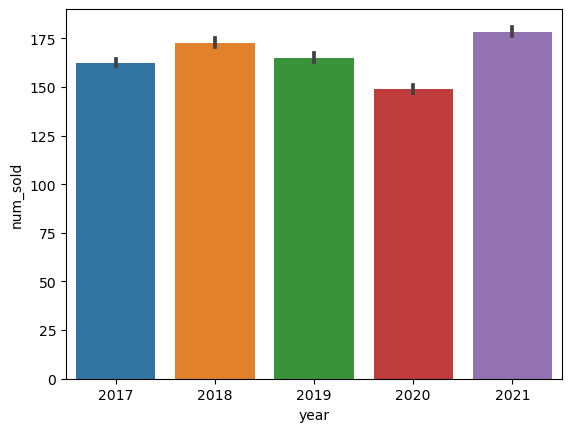

In [98]:
sns.barplot(x = df['year'], y = df['num_sold'])

In [103]:
df[(df['year']==2017)&(df['country']=='Canada')]

,id,date,country,store,product,num_sold,year,month,day,Arg_holiday,...,Japan,Spain,Kagglazon,Kaggle Learn,Kaggle Store,Using LLMs to Improve Your Coding,Using LLMs to Train More LLMs,Using LLMs to Win Friends and Influence People,Using LLMs to Win More Kaggle Competitions,Using LLMs to Write Better
15,15,2017-01-01,Canada,Kaggle Learn,Using LLMs to Improve Your Coding,202,2017,1,1,1,...,0,0,0,1,0,1,0,0,0,0
16,16,2017-01-01,Canada,Kaggle Learn,Using LLMs to Train More LLMs,199,2017,1,1,1,...,0,0,0,1,0,0,1,0,0,0
17,17,2017-01-01,Canada,Kaggle Learn,Using LLMs to Win Friends and Influence People,31,2017,1,1,1,...,0,0,0,1,0,0,0,1,0,0
18,18,2017-01-01,Canada,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,202,2017,1,1,1,...,0,0,0,1,0,0,0,0,1,0
19,19,2017-01-01,Canada,Kaggle Learn,Using LLMs to Write Better,138,2017,1,1,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27325,27325,2017-12-31,Canada,Kagglazon,Using LLMs to Improve Your Coding,1266,2017,12,31,0,...,0,0,1,0,0,1,0,0,0,0
27326,27326,2017-12-31,Canada,Kagglazon,Using LLMs to Train More LLMs,1223,2017,12,31,0,...,0,0,1,0,0,0,1,0,0,0
27327,27327,2017-12-31,Canada,Kagglazon,Using LLMs to Win Friends and Influence People,191,2017,12,31,0,...,0,0,1,0,0,0,0,1,0,0
27328,27328,2017-12-31,Canada,Kagglazon,Using LLMs to Win More Kaggle Competitions,1048,2017,12,31,0,...,0,0,1,0,0,0,0,0,1,0


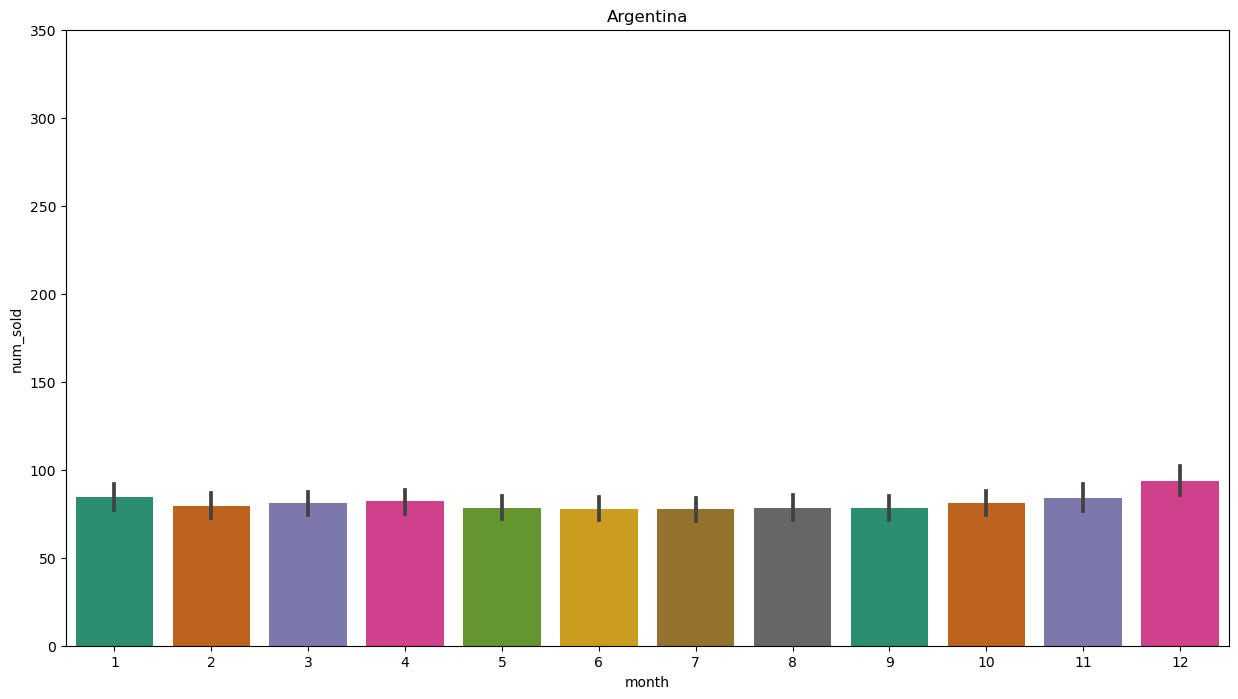

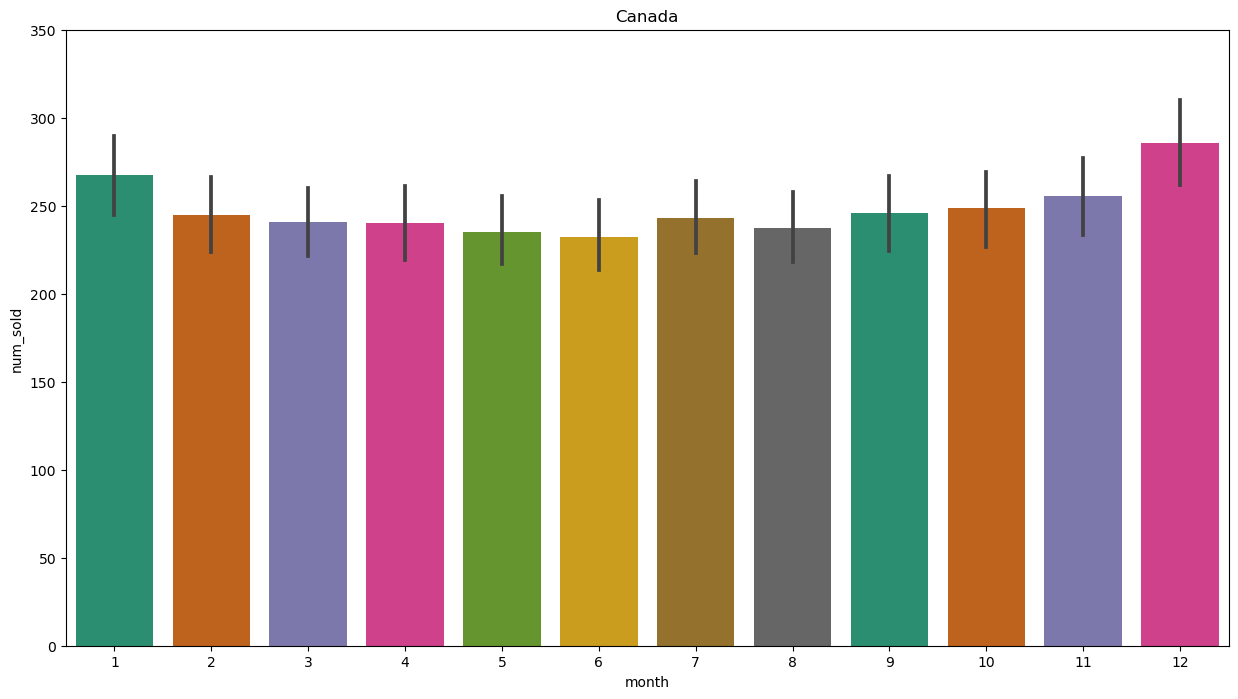

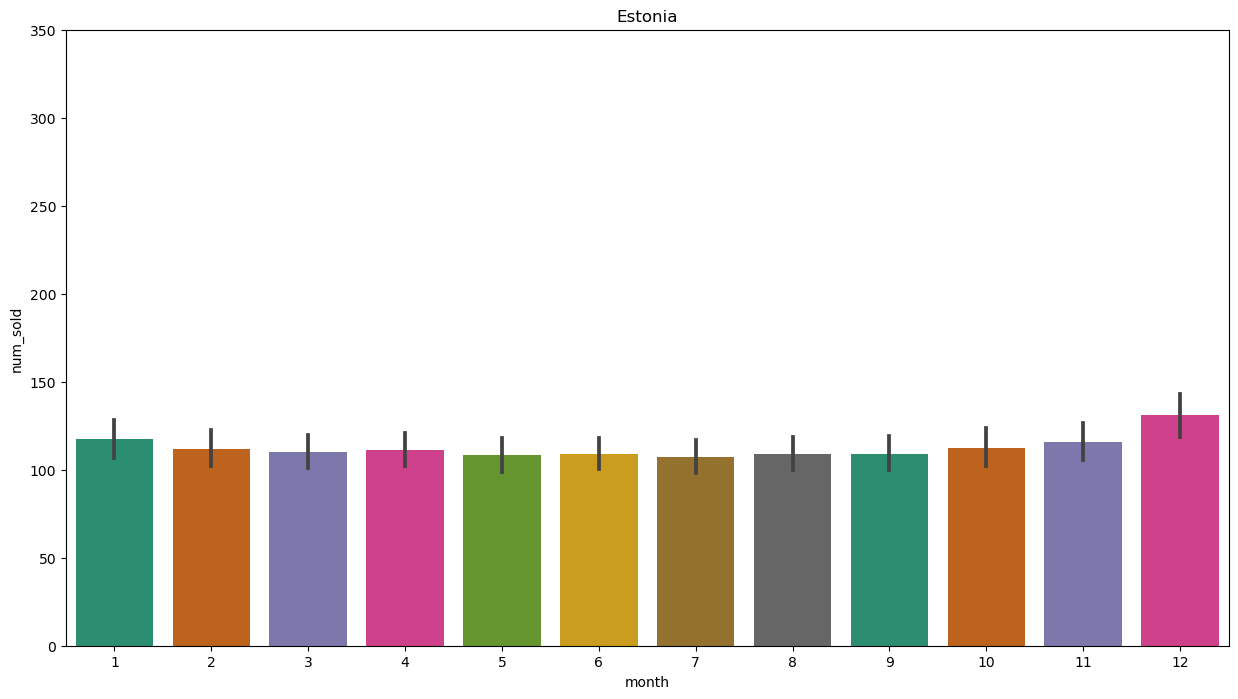

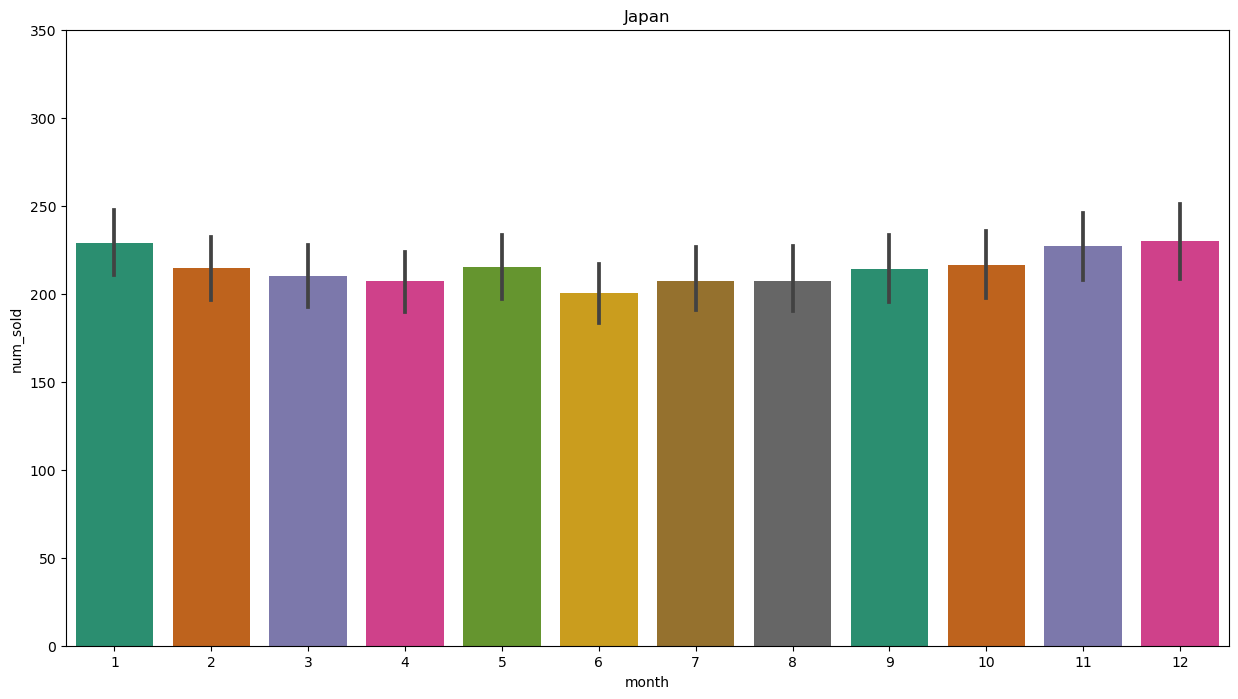

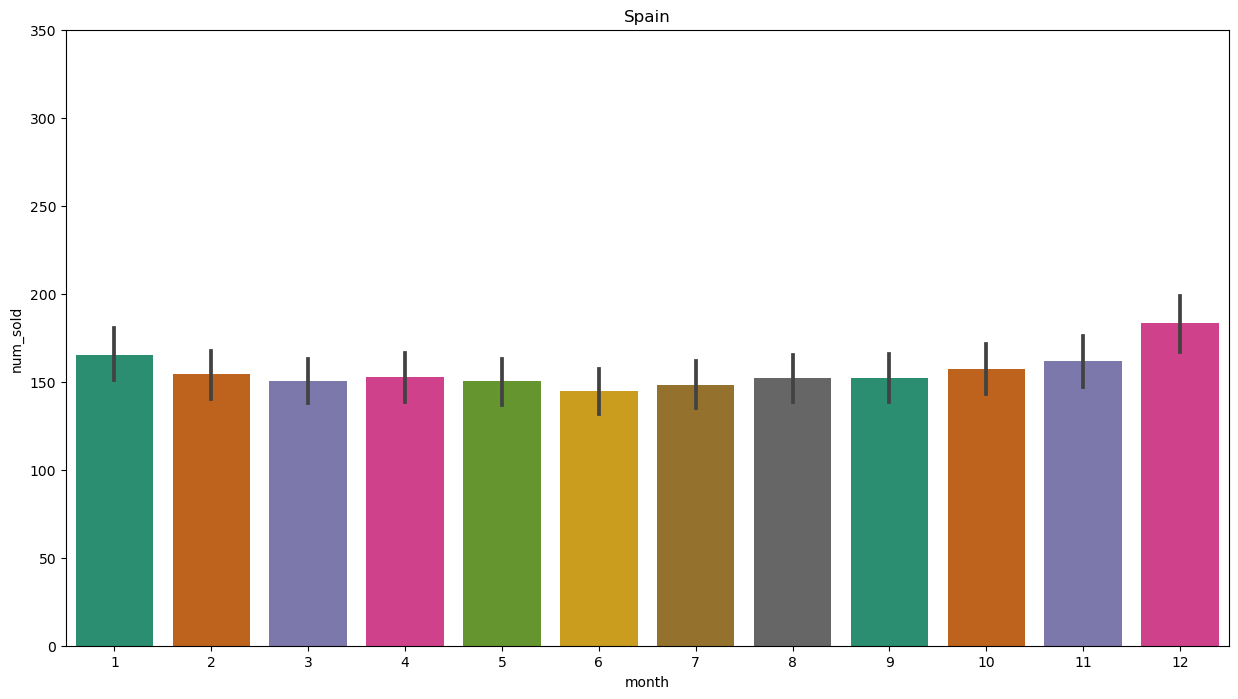

In [129]:
for i in df['country'].unique():
    fig, ax = plt.subplots(1,1, figsize = (15,8))
    sns.barplot(x = df[(df['year']==2017)&(df['country']==i)].month, y =df['num_sold'], palette='Dark2')
    plt.title(i)
    plt.ylim(0, 350)